Reading the data from the dataset

In [68]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 

Renergy=pd.read_csv(r"C:\Users\Krish\OneDrive\Desktop\Python\complete_renewable_energy_dataset.csv")

Reviewing the data 

In [69]:
Renergy.head()

,Country,Year,Energy Type,Production (GWh),Installed Capacity (MW),Investments (USD),Population,GDP,Energy Consumption,Energy Exports,...,Economic Freedom Index,Ease of Doing Business,Innovation Index,Number of Research Institutions,Number of Renewable Energy Conferences,Number of Renewable Energy Publications,Energy Sector Workforce,Proportion of Energy from Renewables,Public-Private Partnerships in Energy,Regional Renewable Energy Cooperation
0,USA,2011,Solar,85404.690027,5549.794323,5.604125e+09,1064007213,1.775278e+14,369654.644184,93087.198199,...,49.216800,57.678605,76.803228,851,75,6361,511658,25.907895,1,0
1,Australia,2008,Geothermal,22205.069382,43211.593798,6.361886e+08,1033255852,6.435372e+13,771781.636293,1752.536054,...,79.990942,1.761579,48.697825,590,39,9752,974948,95.003547,0,1
2,Canada,2013,Biomass,94102.732038,6139.117212,6.158680e+09,14895124,1.567926e+14,342707.152899,65146.592498,...,94.374040,77.657334,67.334813,101,7,311,326318,67.354539,1,0
3,Japan,2010,Biomass,88771.932910,40323.639260,8.526116e+09,1448827283,1.350464e+14,498839.574253,50257.591014,...,65.143472,44.987734,4.544289,327,3,7708,506078,33.754104,0,0
4,China,2018,Solar,93288.408581,30755.403056,5.086237e+09,1499494307,8.677956e+13,819064.362785,63101.395562,...,86.213626,62.535223,10.287199,985,69,4919,187964,59.509228,1,0


In [70]:
Renergy.isnull().sum()

Country                                    0
Year                                       0
Energy Type                                0
Production (GWh)                           0
Installed Capacity (MW)                    0
Investments (USD)                          0
Population                                 0
GDP                                        0
Energy Consumption                         0
Energy Exports                             0
Energy Imports                             0
CO2 Emissions                              0
Renewable Energy Jobs                      0
Government Policies                        0
R&D Expenditure                            0
Renewable Energy Targets                   0
Average Annual Temperature                 0
Annual Rainfall                            0
Solar Irradiance                           0
Wind Speed                                 0
Hydro Potential                            0
Geothermal Potential                       0
Biomass Av

Cleaning the data by removing non-informative columns for analyses

In [210]:
rem=['Import Tariffs on Energy Equipment','Wind Speed','Annual Rainfall','Public-Private Partnerships in Energy','Renewable Energy Education Programs','Local Manufacturing Capacity','Political Stability','Ease of Doing Business','Technology Transfer Agreements','Corruption Perception Index','Solar Irradiance','Rule of Law','Control of Corruption']
renergy=Renergy.drop(columns=rem)

Showcasing the types of energy and their utilization

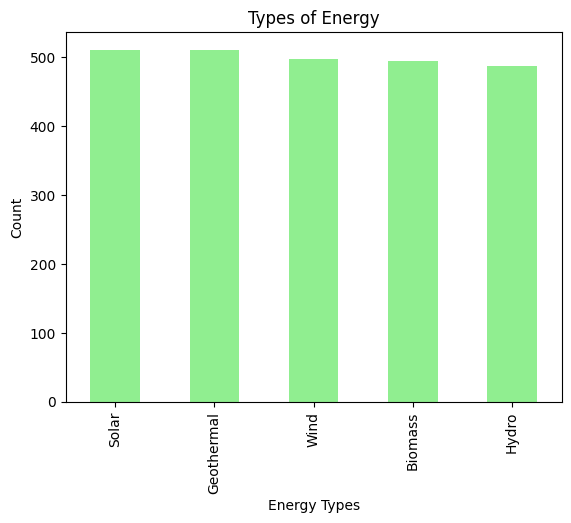

In [72]:
renergy['Energy Type'].value_counts().plot(kind='bar',color='lightgreen')
plt.title('Types of Energy')
plt.xlabel('Energy Types')
plt.ylabel('Count')
plt.show()

A plot for Year wise Energy Production

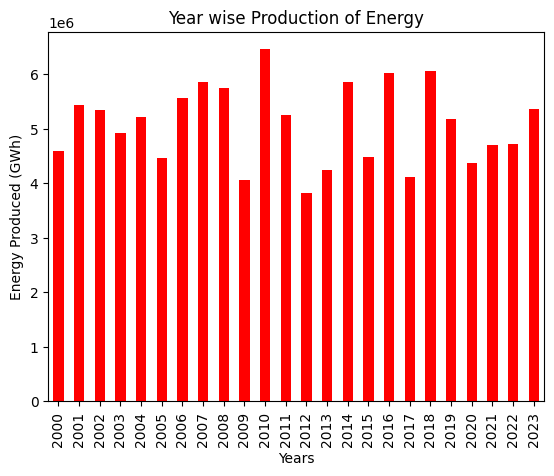

In [82]:

Yes=renergy.groupby('Year')['Production (GWh)'].sum()
Yes.plot(kind='bar',color='red')
plt.title('Year wise Production of Energy')
plt.xlabel('Years')
plt.ylabel('Energy Produced (GWh)')
plt.show()

Installed Capacity of different Countries

Text(0.5, 1.0, 'Capacity of Countries')

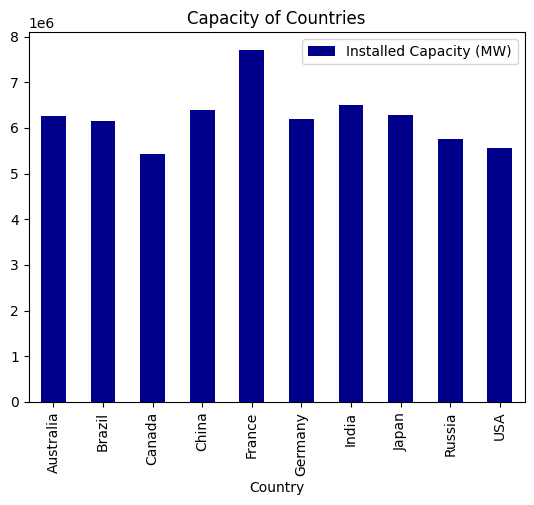

In [88]:
renergy.groupby('Country').agg({'Installed Capacity (MW)': 'sum'}).plot(kind='bar',color='darkblue')
plt.title('Capacity of Countries')

Comparing the Energy consumption and C02 emissions through the years

Text(0.5, 0, 'Years')

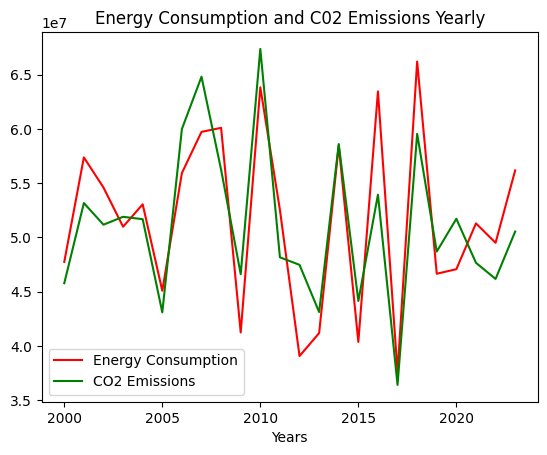

In [93]:
Q=renergy.groupby('Year').agg({'Energy Consumption':'sum','CO2 Emissions':'sum'})
Q.plot(kind='line',color=('red','green'))
plt.title('Energy Consumption and C02 Emissions Yearly')
plt.xlabel('Years')

Average Annual Temperature of Countries

Text(0.5, 1.0, 'Average Annual Temperature')

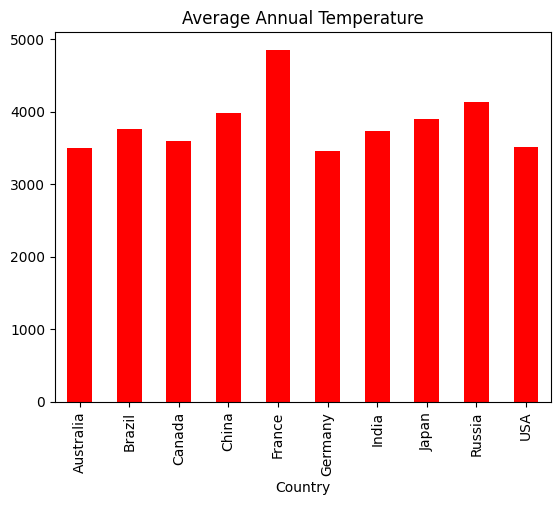

In [106]:
renergy.groupby('Country')['Average Annual Temperature'].sum().plot(kind='bar',color='red')
plt.title('Average Annual Temperature')

Showcasing the yearly investments and R&D Expenditure

<Axes: xlabel='Year'>

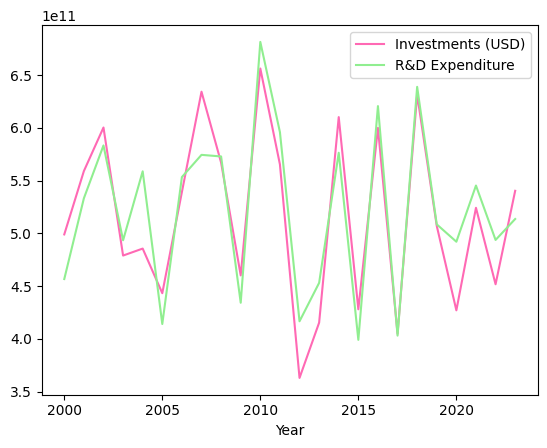

In [115]:
renergy.groupby('Year').agg({'Investments (USD)':'sum','R&D Expenditure':'sum'}).plot(kind='line',color=('hotpink','lightgreen'))

How much energy has been provided from each type of Energy source in India

<Figure size 1000x10000 with 0 Axes>

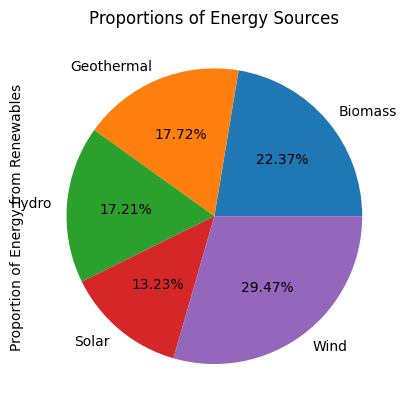

<Figure size 1000x10000 with 0 Axes>

In [155]:
renergy[renergy['Country']=='India'].groupby('Energy Type')['Proportion of Energy from Renewables'].sum().plot(kind='pie',autopct='%0.2f%%')
plt.title('Proportions of Energy Sources')
plt.figure(figsize=(10,100))

Which Countries produce the most energy using Hydro Power

Australia
Germany
Canada


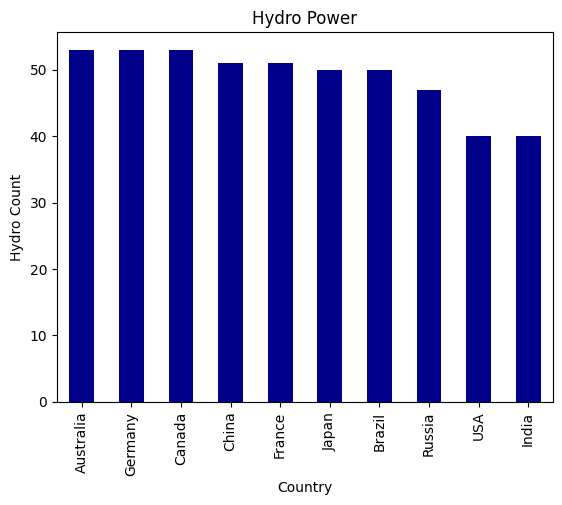

In [194]:
renergy[renergy['Energy Type']=='Hydro']['Country'].value_counts().plot(kind='bar',color='darkblue')
plt.title('Hydro Power')
plt.ylabel('Hydro Count')

print('Australia\nGermany\nCanada')

Showcasing the impact of Population on Energy Sector Workforce and Renewable Energy Jobs

<Axes: xlabel='Year'>

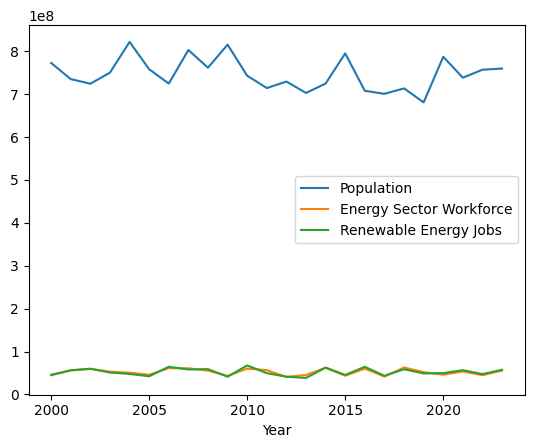

In [185]:
renergy.groupby('Year').agg({'Population':'mean','Energy Sector Workforce':'sum','Renewable Energy Jobs':'sum'}).plot(kind='line')

Corelations of Institutions and Publications

Text(0.5, 1.0, 'Corelations of Institutions and Publications')

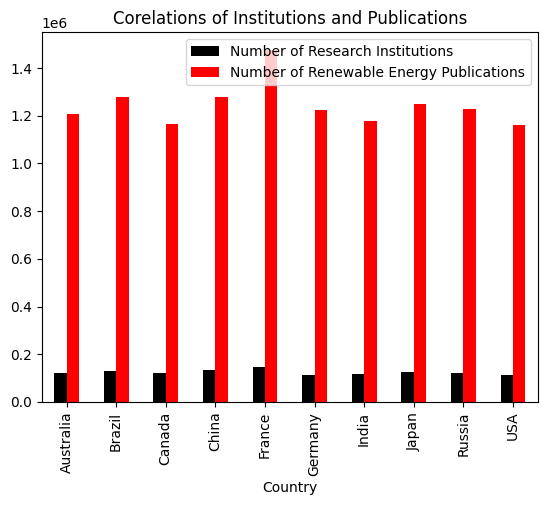

In [208]:
renergy.groupby('Country').agg({'Number of Research Institutions':'sum','Number of Renewable Energy Publications':'sum'}).plot(kind='bar',color=('black','red'))
plt.title("Corelations of Institutions and Publications")

Which Country produces the most Solar Energy

In [241]:
Solar=renergy[renergy['Energy Type']=='Solar']
Solar=Solar.loc[Solar['Production (GWh)'].idxmax()]

print(Solar['Country'],"is the Country which produces the most Energy using Solar Energy")

Brazil is the Country which produces the most Energy using Solar Energy


Which countries imports and Exports the most energy

In [239]:
Exp=renergy.loc[renergy['Energy Exports'].idxmax()]
print(Exp['Country'],"is the Country which exports the most Energy")

Imp=renergy.loc[renergy['Energy Imports'].idxmax()]
print(Imp['Country'],"is the Country which Imports the most Energy")

China is the Country which exports the most Energy
India is the Country which Imports the most Energy


Which countries imports and Exports the least energy

In [240]:
Exp=renergy.loc[renergy['Energy Exports'].idxmin()]
print(Exp['Country'],"is the Country which exports the least Energy")

Imp=renergy.loc[renergy['Energy Imports'].idxmin()]
print(Imp['Country'],"is the Country which Imports the least Energy")

USA is the Country which exports the least Energy
Canada is the Country which Imports the least Energy
